# Import libraries and load dataset

In [10]:
# Use pandas to load data from a CSV file
import pandas as pd
# Use numpy for numerical operations
import numpy as np
# Use matplotlib for plotting
import matplotlib.pyplot as plt
# Use seaborn for enhanced plotting
import seaborn as sns
# Use ipaddress to convert IP to binary format
import ipaddress

In [3]:
# Set file path of raw dataset
file_path = 'Darknet.csv'

# Read the dataset
df = pd.read_csv(file_path)

# Dataset Visualization 

In [4]:
# Visualize attributes which are more categorical in nature
attribute = 'Src Port'

# Group values of a feature by the labels
try:
    grouped = df.groupby('Label')[attribute].value_counts()
except KeyError as e:
    print("Failed to group data: ", e)

# Print grouped data line by line
"""for line in grouped.items():
    print(f"{line[0]}: {line[1]}")"""

# Print the first 5 most frequent features for each label type
for label in grouped.index.levels[0]:
    print(f"\nTop 5 {attribute} for label '{label}':")
    top_values = grouped[label].head(5)
    for value, count in top_values.items():
        print(f"{attribute} {value}: {count} occurances")


Top 5 Src Port for label 'Non-Tor':
Src Port 9100: 9118 occurances
Src Port 80: 6568 occurances
Src Port 443: 4119 occurances
Src Port 51413: 629 occurances
Src Port 34803: 172 occurances

Top 5 Src Port for label 'NonVPN':
Src Port 137: 670 occurances
Src Port 0: 628 occurances
Src Port 17500: 520 occurances
Src Port 443: 502 occurances
Src Port 61009: 448 occurances

Top 5 Src Port for label 'Tor':
Src Port 443: 342 occurances
Src Port 54453: 104 occurances
Src Port 41071: 60 occurances
Src Port 36922: 58 occurances
Src Port 58167: 50 occurances

Top 5 Src Port for label 'VPN':
Src Port 40273: 791 occurances
Src Port 443: 729 occurances
Src Port 15685: 454 occurances
Src Port 49539: 452 occurances
Src Port 51413: 109 occurances


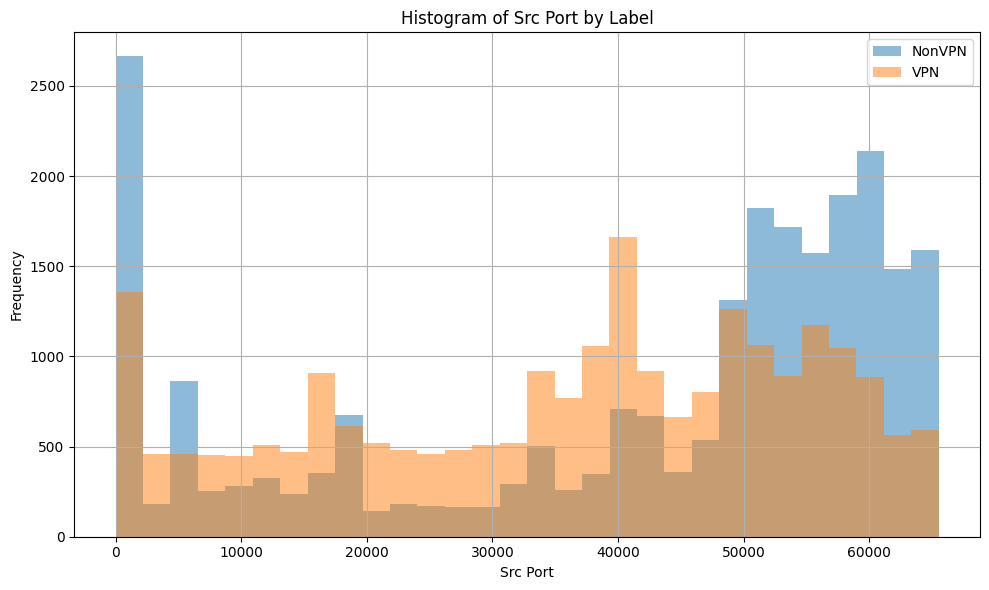

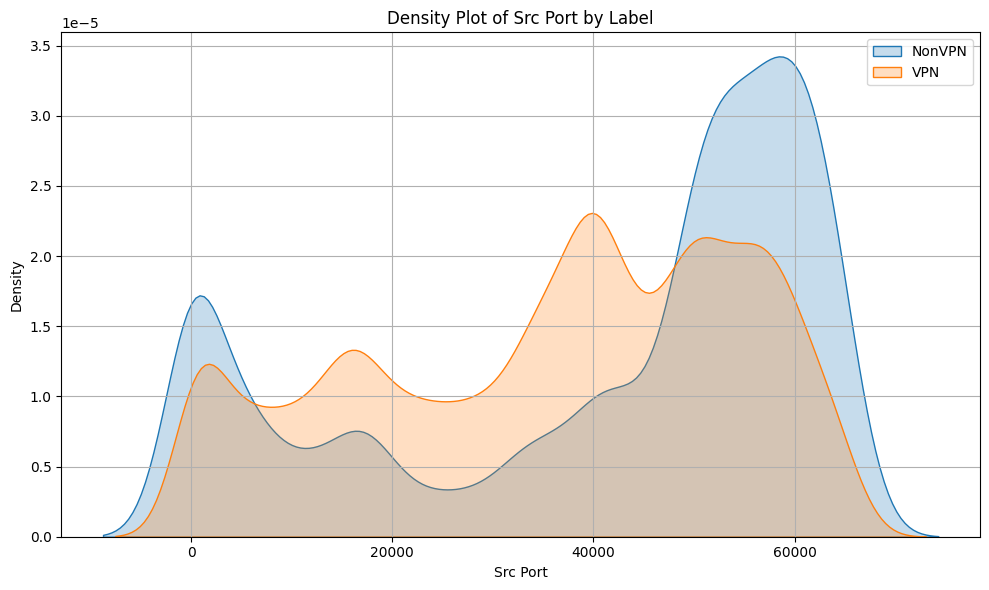

In [ ]:
# Visualize attributes which are more numerical in nature using matplotlib histograms
attribute = 'Src Port'

# Get unique labels
# labels = ['Non-Tor', 'NonVPN', 'Tor', 'VPN']
labels = ['NonVPN', 'VPN']

# Initialize a figure for plotting
plt.figure(figsize=(10, 6))

# Plot a histogram for each label
for label in labels:
    subset = df[df['Label'] == label]
    plt.hist(subset[attribute], bins=30, alpha=0.5, label=label, density=False)

plt.title(f"Histogram of {attribute} by Label")
plt.xlabel(attribute)
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize distribution of attributes using seaborn kdeplot
import seaborn as sns

plt.figure(figsize=(10, 6))

for label in labels:
    subset = df[df['Label'] == label]
    sns.kdeplot(subset[attribute], label=label, fill=True, common_norm=False)

plt.title(f"Density Plot of {attribute} by Label")
plt.xlabel(attribute)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Data Pre-Processing & Cleaning

In [ ]:
# Drop unnecessary columns

# Drop the 'Label.1' column if it exists (another label column containing package type: streaming, browsing, email, file, etc.)
df.drop(columns=['Label.1'], inplace=True, errors='ignore')
# Drop the 'Flow ID' column if it exists
df.drop(columns=['Flow ID'], inplace=True, errors='ignore')

# Convert source and destination IP addresses to 32-bit binary as list of ints (sort of one-hot encoding IP addresses)
def ip_to_binary(ip):
    try:
        # Get the integer representation of the IP address and format it as a 32-bit binary string, mapped into a list of integers
        return list(map(int, format(int(ipaddress.ip_address(ip)), '032b')))
    except ValueError:
        # If the value is already a size 32 list, return it as is
        if isinstance(ip, list) and len(ip) == 32:
            return ip
        # If the IP address is invalid, return a list of zeros
        else:
            return [0] * 32
df['Src IP'] = df['Src IP'].apply(ip_to_binary)
df['Dst IP'] = df['Dst IP'].apply(ip_to_binary)

# Drop 'Active Mean', 'Active Std', 'Active Max', 'Active Min' columns if they exist, as there are no values in them
df.drop(columns=['Active Mean', 'Active Std', 'Active Max', 'Active Min'], inplace=True, errors='ignore')

# (Optionally) Drop Idle version of above columns if they exist, as there are no values in them
df.drop(columns=['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'], inplace=True, errors='ignore')

# Drop 'Timestamp' column since it is not needed for the analysis
# Might be good for training accuracy, but not future data: traffic type is not dependent on datetime
df.drop(columns=['Timestamp'], inplace=True, errors='ignore')

# Print the first few rows of the DataFrame to verify the changes
print(df.head())

                                              Src IP  Src Port  \
0  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     57158   
1  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     57159   
2  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     57160   
3  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     49134   
4  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...     34697   

                                              Dst IP  Dst Port  Flow Duration  \
0  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, ...       443            229   
1  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, ...       443            407   
2  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, ...       443            431   
3  [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, ...       443            359   
4  [1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, ...     19305       10778451   

   Total Fwd Packet  Total Bwd packets  Total Length of Fwd Packet  \
0                 1                  1        

# Dataset Generation